## 0. Set up preparation

### Auto-Reload

In [1]:
%load_ext autoreload
%autoreload 2
# 파이썬 코드를 실행하기 전에 항상 모든 모듈을 Reload

### Add a module path

In [2]:
import os
import sys

In [ ]:
jupyter_run_dir = os.getcwd()
print(f'The current active folder is "{jupyter_run_dir}".\n')

# module path
module_dir = jupyter_run_dir + '/Splitting-data'

sys.path.append(module_dir)
print(sys.path[-1])

The current active folder is "/mnt/4d055040/lab".

/mnt/4d055040/lab/Splitting-data


### Maintain the experiment under the same conditions.

In [4]:
import random
import numpy as np

def seed(seed = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed()

## 1. Splitting

In [ ]:
test_ratio = 0.2

### Loading an npz dataset.
> Loading the npz file saved in `0-image_to_NPZ.ipynb`.

In [5]:
npz_path = '/mnt/7977asdasf/npz/img2npz.npz'
with np.load(npz_path) as f:
    class_names = f['class_names']
    dataset = {'data':f['data'], 'label':f['label']}
class_names, np.unique(dataset['label'], return_counts=True)

(array(['TNBC_baseline', 'Normal'], dtype='<U13'),
 (array([0, 1]), array([609, 277])))

### Splitting into a test dataset and a training dataset.

In [6]:
from utils.utils import make_a_splitset

In [8]:
x_train, x_test, y_train, y_test = make_a_splitset(dataset, class_names, splitset_size=test_ratio, save=False)

Creating training, validation, and test datasets. -> test0.2.npz
data shape : (708, 800, 400), (178, 800, 400)
label shape : (708,), (178,)


### Make a K-fold dataset.
> Performing Stratified K-Fold because the current data is imbalanced.

In [33]:
from sklearn.model_selection import StratifiedKFold
from utils.utils import show_DIST

In [34]:
K = 5
# If you want to shuffle the data, you can use the 'random_state' and 'shuffle' options.
skf = StratifiedKFold(n_splits=K)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#### Option 1. Label Encoding

Fold 1:
Class Distribution
0. trainset - Total 566
	Class TNBC_baseline : 389 -> 68.7% (389/566)
	Class Normal : 177 -> 31.3% (177/566)
1. vaildset - Total 142
	Class TNBC_baseline : 98 -> 69.0% (98/142)
	Class Normal : 44 -> 31.0% (44/142)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


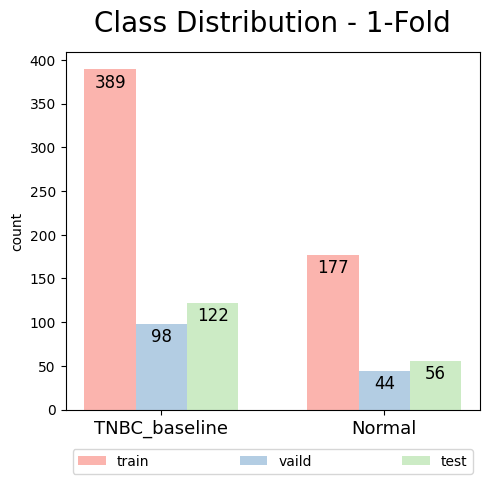

save... /mnt/7977asdasf/npz/1-fold-test0.2.npz

Fold 2:
Class Distribution
0. trainset - Total 566
	Class TNBC_baseline : 389 -> 68.7% (389/566)
	Class Normal : 177 -> 31.3% (177/566)
1. vaildset - Total 142
	Class TNBC_baseline : 98 -> 69.0% (98/142)
	Class Normal : 44 -> 31.0% (44/142)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


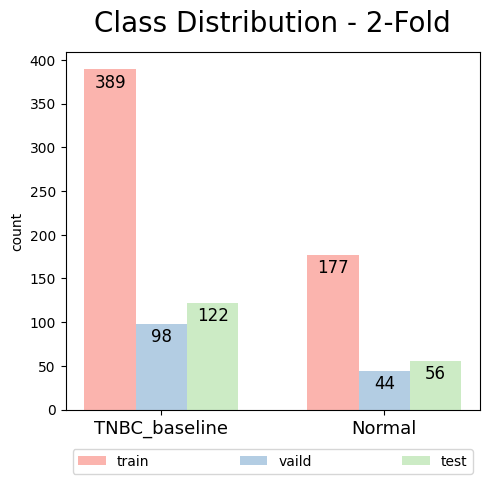

save... /mnt/7977asdasf/npz/2-fold-test0.2.npz

Fold 3:
Class Distribution
0. trainset - Total 566
	Class TNBC_baseline : 390 -> 68.9% (390/566)
	Class Normal : 176 -> 31.1% (176/566)
1. vaildset - Total 142
	Class TNBC_baseline : 97 -> 68.3% (97/142)
	Class Normal : 45 -> 31.7% (45/142)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


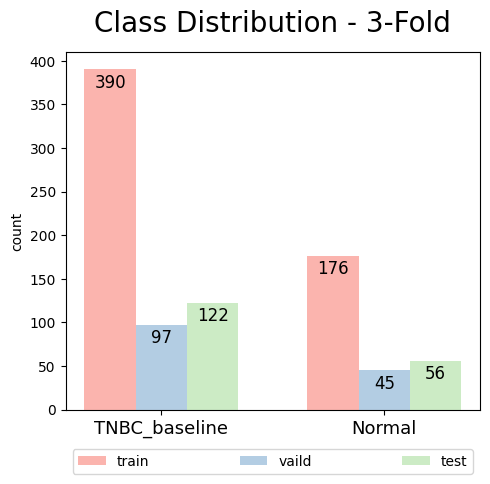

save... /mnt/7977asdasf/npz/3-fold-test0.2.npz

Fold 4:
Class Distribution
0. trainset - Total 567
	Class TNBC_baseline : 390 -> 68.8% (390/567)
	Class Normal : 177 -> 31.2% (177/567)
1. vaildset - Total 141
	Class TNBC_baseline : 97 -> 68.8% (97/141)
	Class Normal : 44 -> 31.2% (44/141)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


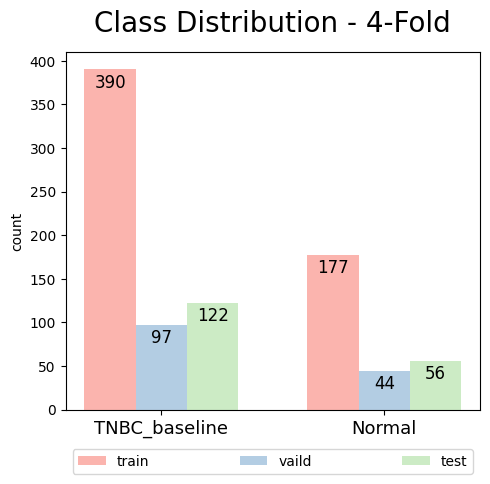

save... /mnt/7977asdasf/npz/4-fold-test0.2.npz

Fold 5:
Class Distribution
0. trainset - Total 567
	Class TNBC_baseline : 390 -> 68.8% (390/567)
	Class Normal : 177 -> 31.2% (177/567)
1. vaildset - Total 141
	Class TNBC_baseline : 97 -> 68.8% (97/141)
	Class Normal : 44 -> 31.2% (44/141)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


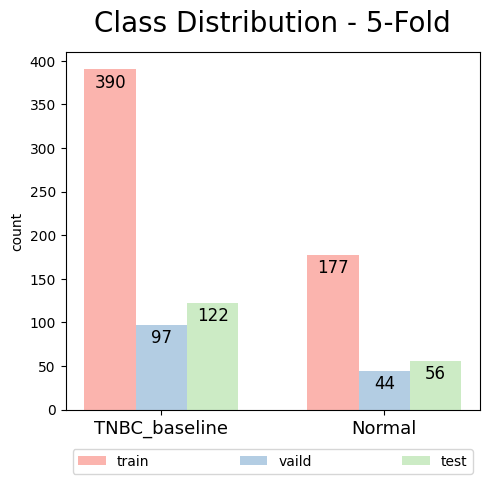

save... /mnt/7977asdasf/npz/5-fold-test0.2.npz



In [50]:
save_dir = '/mnt/797cf4e7-1dc1-4e40-ac32-d4f55c462ff4/aima/dataset/TNBC/npz-split'

for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    print(f"Fold {i+1}:")
    save_name = f'{i+1}-fold-test{test_ratio}.npz'    
    # label encoding
    x_train_, y_train_ = x_train[train_index], y_train[train_index]
    x_valid_, y_valid_ = x_train[test_index],  y_train[test_index]    
    show_DIST(class_names, {'train':y_train_, 'vaild':y_valid_, 'test':y_test}, plt_title=f'Class Distribution - {i+1}-Fold')
    
    np.savez(os.path.join(save_dir, save_name), class_names=np.array(class_names),
             x_train=x_train_, x_valid=x_valid_, x_test=x_test, y_train=y_train_, y_valid=y_valid_, y_test=y_test)
    print(f'save... {os.path.join(save_dir, save_name)}\n')

#### Option 2. One-hot Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder
enc, enc2 = OneHotEncoder(), OneHotEncoder()
enc.fit(y_test.reshape(-1,1).tolist())
enc2.fit(y_train.reshape(-1,1).tolist())
print(f'label is {enc.categories_}')
y_test_one_hot = enc.transform(y_test.reshape(-1,1).tolist()).toarray()
y_train_one_hot = enc2.transform(y_train.reshape(-1,1).tolist()).toarray()

print(f'test label is {y_test[0]} -> {y_test_one_hot[0]} (one-hot)')
print(f'one-hot label - inverse -> {enc.inverse_transform(y_test_one_hot[:1])}')

y_test_one_hot = np.array(y_test_one_hot)
y_train_one_hot = np.array(y_train_one_hot)

label is [array([0, 1])]
test label is 1 -> [0. 1.] (one-hot)
one-hot label - inverse -> [[1]]


Fold 1:
Class Distribution
0. trainset - Total 566
	Class TNBC_baseline : 389 -> 68.7% (389/566)
	Class Normal : 177 -> 31.3% (177/566)
1. vaildset - Total 142
	Class TNBC_baseline : 98 -> 69.0% (98/142)
	Class Normal : 44 -> 31.0% (44/142)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


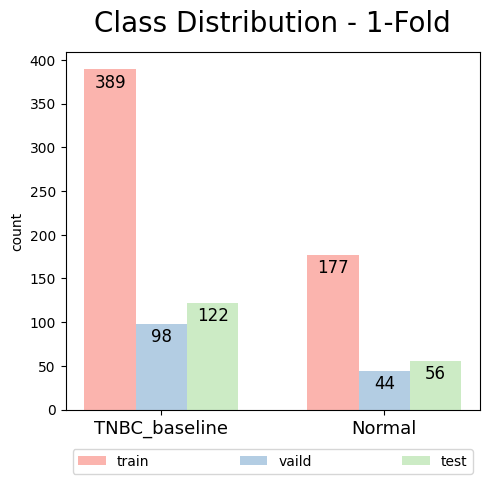

save... /mnt/7977asdasf/npz/1-fold-test0.2.npz

Fold 2:
Class Distribution
0. trainset - Total 566
	Class TNBC_baseline : 389 -> 68.7% (389/566)
	Class Normal : 177 -> 31.3% (177/566)
1. vaildset - Total 142
	Class TNBC_baseline : 98 -> 69.0% (98/142)
	Class Normal : 44 -> 31.0% (44/142)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


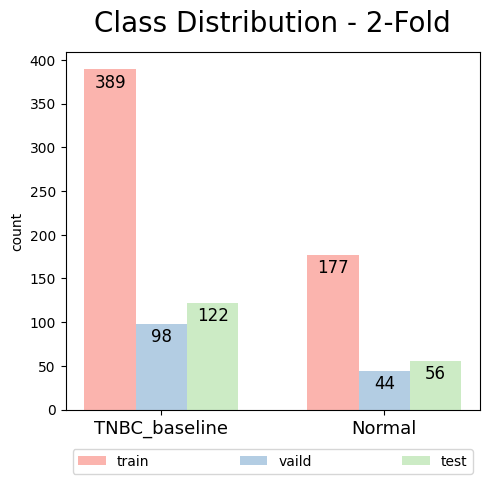

save... /mnt/7977asdasf/npz/2-fold-test0.2.npz

Fold 3:
Class Distribution
0. trainset - Total 566
	Class TNBC_baseline : 390 -> 68.9% (390/566)
	Class Normal : 176 -> 31.1% (176/566)
1. vaildset - Total 142
	Class TNBC_baseline : 97 -> 68.3% (97/142)
	Class Normal : 45 -> 31.7% (45/142)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


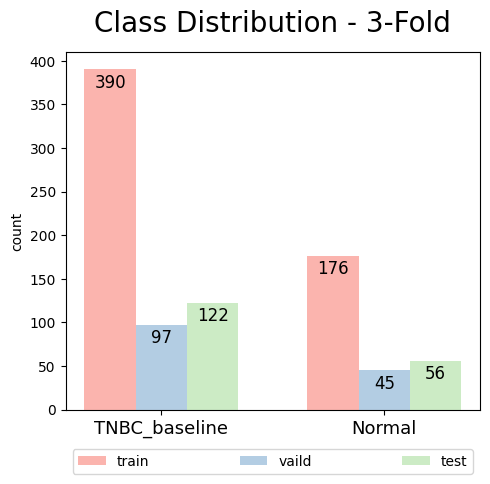

save... /mnt/7977asdasf/npz/3-fold-test0.2.npz

Fold 4:
Class Distribution
0. trainset - Total 567
	Class TNBC_baseline : 390 -> 68.8% (390/567)
	Class Normal : 177 -> 31.2% (177/567)
1. vaildset - Total 141
	Class TNBC_baseline : 97 -> 68.8% (97/141)
	Class Normal : 44 -> 31.2% (44/141)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


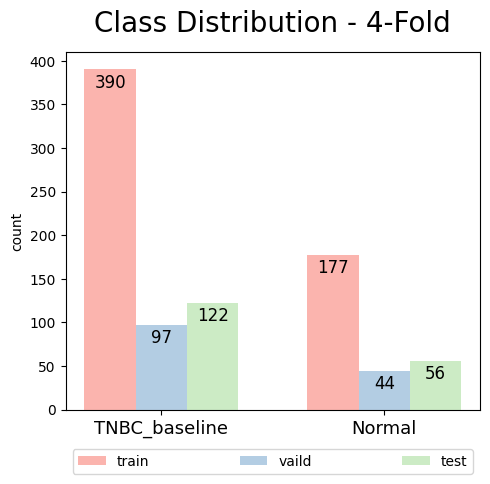

save... /mnt/7977asdasf/npz/4-fold-test0.2.npz

Fold 5:
Class Distribution
0. trainset - Total 567
	Class TNBC_baseline : 390 -> 68.8% (390/567)
	Class Normal : 177 -> 31.2% (177/567)
1. vaildset - Total 141
	Class TNBC_baseline : 97 -> 68.8% (97/141)
	Class Normal : 44 -> 31.2% (44/141)
2. testset - Total 178
	Class TNBC_baseline : 122 -> 68.5% (122/178)
	Class Normal : 56 -> 31.5% (56/178)


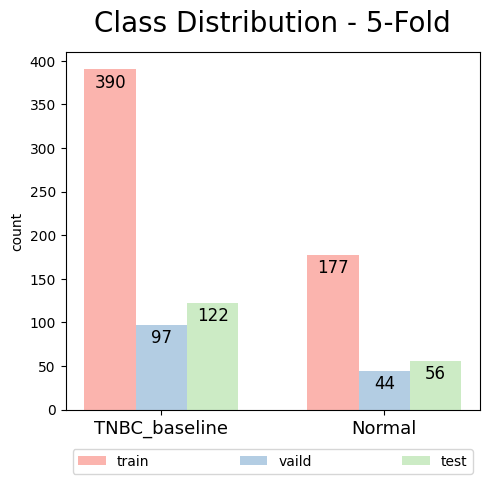

save... /mnt/7977asdasf/npz/5-fold-test0.2.npz



In [54]:
save_dir = '/mnt/7977asdasf/npz/'

for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    print(f"Fold {i+1}:")
    save_name = f'{i+1}-fold-test{test_ratio}.npz'    
    # label encoding
    x_train_, y_train_ = x_train[train_index], y_train_one_hot[train_index]
    x_valid_, y_valid_ = x_train[test_index],  y_train_one_hot[test_index] 
    label_y_train, label_y_valid =   y_train[train_index], y_train[test_index] 
    show_DIST(class_names, {'train':label_y_train, 'vaild':label_y_valid, 'test':y_test}, plt_title=f'Class Distribution - {i+1}-Fold')
    
    np.savez(os.path.join(save_dir, save_name), class_names=np.array(class_names),
             x_train=x_train_, x_valid=x_valid_, x_test=x_test, y_train=y_train_, y_valid=y_valid_, y_test=y_test_one_hot)
    print(f'save... {os.path.join(save_dir, save_name)}\n')